In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
import torchvision
from torchvision import datasets
import torch.optim as optim
from torch.optim import lr_scheduler
import torchvision.transforms as transforms
import numpy as np
import seaborn as sns
%matplotlib inline
import random
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import sklearn as skl
from tqdm import tqdm

from torchsummary import summary
from torch.optim import lr_scheduler
import copy
import time
from PIL import Image
import torch.nn.functional as F
import torch.nn as nn

import torchvision
import torchvision.transforms as T
from torchvision.utils import make_grid

sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
pd.set_option('display.max_columns', 20)

In [2]:
USE_CUDA = torch.cuda.is_available() # GPU를 사용가능하면 True, 아니라면 False를 리턴
device = torch.device("cuda" if USE_CUDA else "cpu") # GPU 사용 가능하면 사용하고 아니면 CPU 사용
print("다음 기기로 학습합니다:", device)

다음 기기로 학습합니다: cuda


In [3]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [4]:
import glob
import shutil
from PIL import Image

# Real, Fake 사진 Train, Valid, Test 분류

In [ ]:
### fake 이미지 분류

fake_photo_list = []
for f in os.listdir('/gdrive/My Drive/Colab Notebooks/RAF/real_and_fake_face/training_fake'):
    if 'jpg' in f:
        fake_photo_list.append(f)

easy_list=[]
for j in fake_photo_list:
    if 'easy' in j:
        easy_list.append(j)

mid_list=[]
for j in fake_photo_list:
    if 'mid' in j:
        mid_list.append(j)

hard_list=[]
for j in fake_photo_list:
    if 'hard' in j:
        hard_list.append(j)


print(len(easy_list), len(mid_list), len(hard_list))




240 480 240


In [ ]:
# In[47]:


easy_train_set, easy_test_set = train_test_split(easy_list, test_size=(1/8), random_state=42)


# In[48]:


easy_train_set, easy_valid_set = train_test_split(easy_train_set, test_size=(1/7), random_state=42)


# In[51]:


for i in easy_train_set:
    shutil.move('/gdrive/My Drive/Colab Notebooks/RAF/real_and_fake_face/training_fake/'+i, '/gdrive/My Drive/Colab Notebooks/RAF/real_and_fake_face/Train/fake')

for i in easy_valid_set:
    shutil.move('/gdrive/My Drive/Colab Notebooks/RAF/real_and_fake_face/training_fake/'+i, '/gdrive/My Drive/Colab Notebooks/RAF/real_and_fake_face/Valid/fake')

for i in easy_test_set:
    shutil.move('/gdrive/My Drive/Colab Notebooks/RAF/real_and_fake_face/training_fake/'+i, '/gdrive/My Drive/Colab Notebooks/RAF/real_and_fake_face/Test/fake')


# In[52]:


### mid fake이미지들 폴더이동

mid_train_set, mid_test_set = train_test_split(mid_list, test_size=(1/8), random_state=42)
mid_train_set, mid_valid_set = train_test_split(mid_train_set, test_size=(1/7), random_state=42)

for i in mid_train_set:
    shutil.move('/gdrive/My Drive/Colab Notebooks/RAF/real_and_fake_face/training_fake/'+i, '/gdrive/My Drive/Colab Notebooks/RAF/real_and_fake_face/Train/fake')

for i in mid_valid_set:
    shutil.move('/gdrive/My Drive/Colab Notebooks/RAF/real_and_fake_face/training_fake/'+i, '/gdrive/My Drive/Colab Notebooks/RAF/real_and_fake_face/Valid/fake')

for i in mid_test_set:
    shutil.move('/gdrive/My Drive/Colab Notebooks/RAF/real_and_fake_face/training_fake/'+i, '/gdrive/My Drive/Colab Notebooks/RAF/real_and_fake_face/Test/fake')


# In[53]:


### hard fake이미지들 폴더이동

hard_train_set, hard_test_set = train_test_split(hard_list, test_size=(1/8), random_state=42)
hard_train_set, hard_valid_set = train_test_split(hard_train_set, test_size=(1/7), random_state=42)

for i in hard_train_set:
    shutil.move('/gdrive/My Drive/Colab Notebooks/RAF/real_and_fake_face/training_fake/'+i, '/gdrive/My Drive/Colab Notebooks/RAF/real_and_fake_face/Train/fake')

for i in hard_valid_set:
    shutil.move('/gdrive/My Drive/Colab Notebooks/RAF/real_and_fake_face/training_fake/'+i, '/gdrive/My Drive/Colab Notebooks/RAF/real_and_fake_face/Valid/fake')

for i in hard_test_set:
    shutil.move('/gdrive/My Drive/Colab Notebooks/RAF/real_and_fake_face/training_fake/'+i, '/gdrive/My Drive/Colab Notebooks/RAF/real_and_fake_face/Test/fake')

In [ ]:

from sklearn.model_selection import train_test_split
import os,sys
real_list = []
for f in os.listdir('/gdrive/My Drive/Colab Notebooks/RAF/real_and_fake_face/training_real'):
    if 'jpg' in f:
        real_list.append(f)

real_train_set, real_test_set = train_test_split(real_list, test_size=0.125, random_state=42)
real_train_set, real_valid_set = train_test_split(real_train_set, test_size=(1/7), random_state=42)

print(len(real_train_set),len(real_valid_set),len(real_test_set))

810 135 136


In [ ]:
for i in real_train_set:
    shutil.move('/gdrive/My Drive/Colab Notebooks/RAF/real_and_fake_face/training_real/'+i, '/gdrive/My Drive/Colab Notebooks/RAF/real_and_fake_face/Train/real')

for i in real_valid_set:
    shutil.move('/gdrive/My Drive/Colab Notebooks/RAF/real_and_fake_face/training_real/'+i, '/gdrive/My Drive/Colab Notebooks/RAF/real_and_fake_face/Valid/real')

for i in real_test_set:
    shutil.move('/gdrive/My Drive/Colab Notebooks/RAF/real_and_fake_face/training_real/'+i, '/gdrive/My Drive/Colab Notebooks/RAF/real_and_fake_face/Test/real')


# Data loading with Augmentation, Normalization

In [ ]:
import os,sys
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((224,224)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation((-45,45),expand=False),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'valid': transforms.Compose([
        transforms.Resize((224,224)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation((-45,45),expand=False),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
}
PATH='/gdrive/My Drive/Colab Notebooks/RAF/real_and_fake_face/'
data_dir = PATH
image_datasets = {x: torchvision.datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x]) for x in ['train', 'valid','test']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=16,
                                             shuffle=True, num_workers=4) for x in ['train', 'valid','test']}
#dataloader를 사전식으로 저장해놓은거                                             
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'valid','test']}
class_count=[image_datasets['train'],image_datasets['valid'],image_datasets['test']]
class_names = image_datasets['train'].classes
print(class_names)


['fake', 'real']


# 이미지 확인

In [10]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.figure(figsize=(10,10))
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


torch.Size([16, 3, 224, 224])


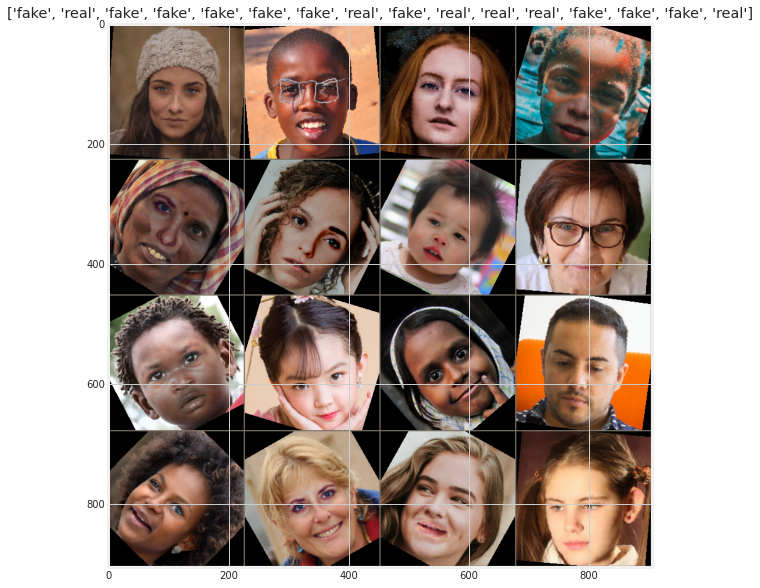

In [ ]:
# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))
print(inputs.shape)
# Make a grid from batch
out = torchvision.utils.make_grid(inputs,nrow=4)

imshow(out, title=[class_names[x] for x in classes])

In [ ]:
inputs[0].shape

torch.Size([3, 224, 224])

# Modeling

In [5]:
import torchvision.models as models
def train_model(model, criterion, optimizer, scheduler, num_epochs=1):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 10)

        # Each epoch has a training and validationidation phase
        for phase in ['train', 'valid']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evalidationuate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                
                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'valid' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best validation Acc: {:4f}'.format(best_acc))
 
    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

## 1. ResNet18_pretrained

### ResNet18_T

In [ ]:
model_ft = models.resnet18(pretrained=True)
model_ft.state_dict

<bound method Module.state_dict of ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)


In [ ]:
model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, 2)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=15)

Epoch 1/15
----------
train Loss: 0.7162 Acc: 0.5791
valid Loss: 0.6951 Acc: 0.6000

Epoch 2/15
----------
train Loss: 0.6504 Acc: 0.6575
valid Loss: 0.6432 Acc: 0.6824

Epoch 3/15
----------
train Loss: 0.6140 Acc: 0.6876
valid Loss: 0.6251 Acc: 0.6510

Epoch 4/15
----------
train Loss: 0.5681 Acc: 0.7150
valid Loss: 0.7877 Acc: 0.6118

Epoch 5/15
----------
train Loss: 0.5147 Acc: 0.7516
valid Loss: 0.7388 Acc: 0.6667

Epoch 6/15
----------
train Loss: 0.4585 Acc: 0.7850
valid Loss: 0.6479 Acc: 0.6824

Epoch 7/15
----------
train Loss: 0.4452 Acc: 0.7817
valid Loss: 0.6028 Acc: 0.7412

Epoch 8/15
----------
train Loss: 0.3184 Acc: 0.8634
valid Loss: 0.6390 Acc: 0.7216

Epoch 9/15
----------
train Loss: 0.2913 Acc: 0.8758
valid Loss: 0.6170 Acc: 0.6941

Epoch 10/15
----------
train Loss: 0.2918 Acc: 0.8810
valid Loss: 0.6295 Acc: 0.7333

Epoch 11/15
----------
train Loss: 0.2947 Acc: 0.8778
valid Loss: 0.6188 Acc: 0.7255

Epoch 12/15
----------
train Loss: 0.2776 Acc: 0.8876
valid Los

#### FC 변경

In [ ]:
from collections import OrderedDict
#num_ftrs = model_ft.fc.in_features
model_ft.fc = torch.nn.Sequential(OrderedDict([
            ('Linear1',torch.nn.Linear(512, 2, bias=True)),
            ('Dropout1',torch.nn.Dropout(0.5,inplace=False)),
            ('ReLU1',torch.nn.ReLU()),
            ('result',torch.nn.Softmax())]))
print(model_ft.state_dict)
model_ft = model_ft.to(device)

criterion = torch.nn.CrossEntropyLoss()

optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

<bound method Module.state_dict of ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)


In [ ]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=20)

Epoch 1/20
----------


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:117: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


train Loss: 0.6889 Acc: 0.5059
valid Loss: 0.6740 Acc: 0.5804

Epoch 2/20
----------
train Loss: 0.6825 Acc: 0.5294
valid Loss: 0.6660 Acc: 0.6314

Epoch 3/20
----------
train Loss: 0.6615 Acc: 0.5654
valid Loss: 0.6412 Acc: 0.6392

Epoch 4/20
----------
train Loss: 0.6568 Acc: 0.5719
valid Loss: 0.6335 Acc: 0.6392

Epoch 5/20
----------
train Loss: 0.6524 Acc: 0.5582
valid Loss: 0.6262 Acc: 0.6431

Epoch 6/20
----------
train Loss: 0.6438 Acc: 0.5758
valid Loss: 0.6226 Acc: 0.6667

Epoch 7/20
----------
train Loss: 0.6518 Acc: 0.5706
valid Loss: 0.6282 Acc: 0.6627

Epoch 8/20
----------
train Loss: 0.6380 Acc: 0.5922
valid Loss: 0.6056 Acc: 0.7176

Epoch 9/20
----------
train Loss: 0.6372 Acc: 0.5902
valid Loss: 0.6164 Acc: 0.7059

Epoch 10/20
----------
train Loss: 0.6329 Acc: 0.6065
valid Loss: 0.6209 Acc: 0.6824

Epoch 11/20
----------
train Loss: 0.6289 Acc: 0.5928
valid Loss: 0.6148 Acc: 0.6902

Epoch 12/20
----------
train Loss: 0.6315 Acc: 0.6000
valid Loss: 0.6147 Acc: 0.6784


#### ResNet18_F

In [ ]:
model_ft = models.resnet18(pretrained=False)
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, 2)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=15)

Epoch 1/15
----------
train Loss: 0.7139 Acc: 0.5268
valid Loss: 0.7824 Acc: 0.4706

Epoch 2/15
----------
train Loss: 0.7156 Acc: 0.5118
valid Loss: 0.7014 Acc: 0.5451

Epoch 3/15
----------
train Loss: 0.7070 Acc: 0.5248
valid Loss: 0.6983 Acc: 0.5490

Epoch 4/15
----------
train Loss: 0.7210 Acc: 0.5255
valid Loss: 0.7863 Acc: 0.4784

Epoch 5/15
----------
train Loss: 0.6933 Acc: 0.5386
valid Loss: 0.7042 Acc: 0.5412

Epoch 6/15
----------
train Loss: 0.7251 Acc: 0.5209
valid Loss: 0.7415 Acc: 0.5333

Epoch 7/15
----------
train Loss: 0.7179 Acc: 0.5327
valid Loss: 0.7100 Acc: 0.5333

Epoch 8/15
----------
train Loss: 0.6808 Acc: 0.5719
valid Loss: 0.6936 Acc: 0.5373

Epoch 9/15
----------
train Loss: 0.6759 Acc: 0.5582
valid Loss: 0.7026 Acc: 0.5255

Epoch 10/15
----------
train Loss: 0.6764 Acc: 0.5693
valid Loss: 0.6898 Acc: 0.5686

Epoch 11/15
----------
train Loss: 0.6708 Acc: 0.5810
valid Loss: 0.7146 Acc: 0.5294

Epoch 12/15
----------
train Loss: 0.6661 Acc: 0.5732
valid Los

# Data Augmentation_Fivecrop

In [36]:
import os,sys
mean=[0.485, 0.456, 0.406]
std=[0.229, 0.224, 0.225]
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomHorizontalFlip(),
        transforms.Resize((256,256)),
        transforms.FiveCrop(224),
        
        #transforms.RandomRotation((-45,45),expand=False),
        #transforms.ToTensor(),
        #transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        transforms.Lambda(lambda crops: torch.stack([transforms.ToTensor()(crop) for crop in crops])),
        transforms.Lambda(lambda tensors:
                          torch.stack([transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])(t) for t in tensors]))
    ]),
    'valid': transforms.Compose([
        transforms.RandomHorizontalFlip(),
        transforms.Resize((256,256)),
        transforms.FiveCrop(224),
        
        #transforms.RandomRotation((-45,45),expand=False),
        #transforms.ToTensor(),
        #transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        transforms.Lambda(lambda crops: torch.stack([transforms.ToTensor()(crop) for crop in crops])),
        transforms.Lambda(lambda tensors:
                          torch.stack([transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])(t) for t in tensors]))
    ]),
    'test': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
}
PATH='/gdrive/My Drive/Colab Notebooks/RAF/real_and_fake_face/'
data_dir = PATH
image_datasets = {x: torchvision.datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x]) for x in ['train', 'valid','test']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=16,
                                             shuffle=True) for x in ['train', 'valid','test']}
#dataloader를 사전식으로 저장해놓은거                                             
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'valid','test']}
class_count=[image_datasets['train'],image_datasets['valid'],image_datasets['test']]
class_names = image_datasets['train'].classes
print(class_names)


['fake', 'real']


# 이미지 확인

In [15]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.figure(figsize=(20,20))
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


torch.Size([16, 5, 3, 224, 224])


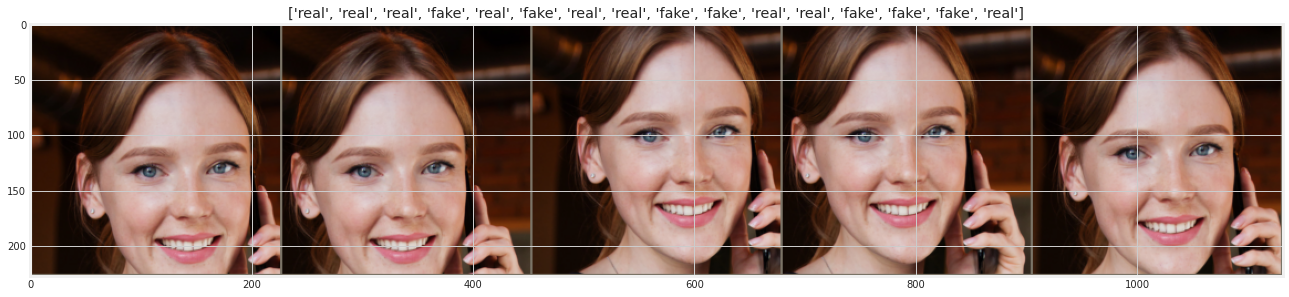

In [19]:
# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))
print(inputs.shape)
# Make a grid from batch
out = torchvision.utils.make_grid(inputs[10].reshape(-1, 3, 224, 224))

imshow(out, title=[class_names[x] for x in classes])

In [ ]:
inputs[4].shape

torch.Size([3, 224, 224])

In [22]:
import torchvision.models as models
def train_model(model, criterion, optimizer, scheduler, num_epochs=1):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 10)

        # Each epoch has a training and validationidation phase
        for phase in ['train', 'valid']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evalidationuate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                
                # zero the parameter gradients
                optimizer.zero_grad()
                bs, ncrops, c, h, w = inputs.size()
                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs.view(-1, c, h, w))
                    outputs_avg = outputs.view(bs, ncrops, -1).mean(1)
                    _, preds = torch.max(outputs_avg, 1)
                    loss = criterion(outputs_avg, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'valid' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best validation Acc: {:4f}'.format(best_acc))
 
    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

#### 기본 resenet18_pretrained

In [21]:
model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, 2)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=15)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth



Epoch 1/15
----------


ValueError: ignored

#### 기본 ResNEt + FC 변형

In [ ]:
from collections import OrderedDict
#num_ftrs = model_ft.fc.in_features
model_ft = models.resnet18(pretrained=True)
model_ft.fc = torch.nn.Sequential(OrderedDict([
            ('Linear1',torch.nn.Linear(512, 2, bias=True)),
            ('Dropout1',torch.nn.Dropout(0.5,inplace=False)),
            ('ReLU1',torch.nn.ReLU()),
            ('result',torch.nn.Softmax())]))
print(model_ft.state_dict)
model_ft = model_ft.to(device)

criterion = torch.nn.CrossEntropyLoss()

optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=15)

<bound method Module.state_dict of ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:117: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


train Loss: 0.6028 Acc: 0.7641
valid Loss: 0.5984 Acc: 0.7176

Epoch 2/15
----------
train Loss: 0.5371 Acc: 0.8928
valid Loss: 0.5786 Acc: 0.7294

Epoch 3/15
----------
train Loss: 0.5234 Acc: 0.9190
valid Loss: 0.5734 Acc: 0.7333

Epoch 4/15
----------
train Loss: 0.5065 Acc: 0.9444
valid Loss: 0.5657 Acc: 0.7451

Epoch 5/15
----------
train Loss: 0.5138 Acc: 0.9346
valid Loss: 0.5680 Acc: 0.7529

Epoch 6/15
----------
train Loss: 0.5087 Acc: 0.9464
valid Loss: 0.5697 Acc: 0.7529

Epoch 7/15
----------
train Loss: 0.5051 Acc: 0.9477
valid Loss: 0.5648 Acc: 0.7608

Epoch 8/15
----------
train Loss: 0.4945 Acc: 0.9627
valid Loss: 0.5785 Acc: 0.7176

Epoch 9/15
----------
train Loss: 0.4967 Acc: 0.9673
valid Loss: 0.5685 Acc: 0.7216

Epoch 10/15
----------
train Loss: 0.4915 Acc: 0.9654
valid Loss: 0.5728 Acc: 0.7294

Epoch 11/15
----------
train Loss: 0.4947 Acc: 0.9614
valid Loss: 0.5654 Acc: 0.7373

Epoch 12/15
----------
train Loss: 0.5007 Acc: 0.9562
valid Loss: 0.5607 Acc: 0.7529


#### ResNet + 변형 FC + weight decay 0.1

In [14]:
from collections import OrderedDict
#num_ftrs = model_ft.fc.in_features
model_ft = models.resnet18(pretrained=True)
model_ft.fc = torch.nn.Sequential(OrderedDict([
            ('Linear1',torch.nn.Linear(512, 2, bias=True)),
            ('Dropout1',torch.nn.Dropout(0.5,inplace=False)),
            ('ReLU1',torch.nn.ReLU()),
            ('result',torch.nn.Softmax())]))
print(model_ft.state_dict)
model_ft = model_ft.to(device)

criterion = torch.nn.CrossEntropyLoss()

optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9,weight_decay=0.1)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=15)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth



<bound method Module.state_dict of ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:117: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


train Loss: 0.6872 Acc: 0.5608
valid Loss: 0.6602 Acc: 0.5961

Epoch 2/15
----------
train Loss: 0.6557 Acc: 0.6444
valid Loss: 0.6491 Acc: 0.6235

Epoch 3/15
----------
train Loss: 0.6410 Acc: 0.6706
valid Loss: 0.6380 Acc: 0.6392

Epoch 4/15
----------
train Loss: 0.6258 Acc: 0.7137
valid Loss: 0.6307 Acc: 0.6510

Epoch 5/15
----------
train Loss: 0.6089 Acc: 0.7405
valid Loss: 0.6148 Acc: 0.6980

Epoch 6/15
----------
train Loss: 0.5957 Acc: 0.7850
valid Loss: 0.6120 Acc: 0.7020

Epoch 7/15
----------
train Loss: 0.5837 Acc: 0.8078
valid Loss: 0.6105 Acc: 0.6824

Epoch 8/15
----------
train Loss: 0.5658 Acc: 0.8418
valid Loss: 0.6027 Acc: 0.7059

Epoch 9/15
----------
train Loss: 0.5593 Acc: 0.8523
valid Loss: 0.5982 Acc: 0.7137

Epoch 10/15
----------
train Loss: 0.5624 Acc: 0.8471
valid Loss: 0.6017 Acc: 0.7176

Epoch 11/15
----------
train Loss: 0.5530 Acc: 0.8791
valid Loss: 0.5963 Acc: 0.7294

Epoch 12/15
----------
train Loss: 0.5544 Acc: 0.8693
valid Loss: 0.6023 Acc: 0.7294


#### ResNet + 변형 FC + weight decay 0.01

In [15]:
from collections import OrderedDict
#num_ftrs = model_ft.fc.in_features
model_ft = models.resnet18(pretrained=True)
model_ft.fc = torch.nn.Sequential(OrderedDict([
            ('Linear1',torch.nn.Linear(512, 2, bias=True)),
            ('Dropout1',torch.nn.Dropout(0.5,inplace=False)),
            ('ReLU1',torch.nn.ReLU()),
            ('result',torch.nn.Softmax())]))
print(model_ft.state_dict)
model_ft = model_ft.to(device)

criterion = torch.nn.CrossEntropyLoss()

optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9,weight_decay=0.01)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=5, gamma=0.1)

model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=15)

<bound method Module.state_dict of ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:117: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


train Loss: 0.6944 Acc: 0.4856
valid Loss: 0.6802 Acc: 0.5686

Epoch 2/15
----------
train Loss: 0.6803 Acc: 0.5693
valid Loss: 0.6637 Acc: 0.6196

Epoch 3/15
----------
train Loss: 0.6698 Acc: 0.6261
valid Loss: 0.6629 Acc: 0.5922

Epoch 4/15
----------
train Loss: 0.6603 Acc: 0.6477
valid Loss: 0.6559 Acc: 0.6471

Epoch 5/15
----------
train Loss: 0.6477 Acc: 0.6706
valid Loss: 0.6335 Acc: 0.6706

Epoch 6/15
----------
train Loss: 0.6345 Acc: 0.6948
valid Loss: 0.6357 Acc: 0.6549

Epoch 7/15
----------
train Loss: 0.6281 Acc: 0.7026
valid Loss: 0.6309 Acc: 0.6667

Epoch 8/15
----------
train Loss: 0.6217 Acc: 0.7163
valid Loss: 0.6298 Acc: 0.6549

Epoch 9/15
----------
train Loss: 0.6251 Acc: 0.7163
valid Loss: 0.6303 Acc: 0.6784

Epoch 10/15
----------
train Loss: 0.6210 Acc: 0.7235
valid Loss: 0.6255 Acc: 0.6784

Epoch 11/15
----------
train Loss: 0.6200 Acc: 0.7281
valid Loss: 0.6257 Acc: 0.6667

Epoch 12/15
----------
train Loss: 0.6197 Acc: 0.7203
valid Loss: 0.6265 Acc: 0.6745


#### VGGNet

In [8]:
vgg = models.vgg16(pretrained=T)
vgg.state_dict

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


<bound method Module.state_dict of VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size

In [19]:

vgg.classifier=torch.nn.Sequential(
    torch.nn.Linear(in_features=25088, out_features=4096, bias=True),
    torch.nn.ReLU(inplace=True),
    torch.nn.Dropout(p=0.5, inplace=False),
    torch.nn.Linear(in_features=4096, out_features=4096, bias=True),
    torch.nn.ReLU(inplace=True),
    torch.nn.Dropout(p=0.5, inplace=False),
    torch.nn.Linear(in_features=4096, out_features=2, bias=True)
  )


In [13]:
print(vgg.state_dict)
vgg=vgg.to(device)
criterion = torch.nn.CrossEntropyLoss()

optimizer_ft = optim.SGD(vgg.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 5 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=5, gamma=0.1)

model_ft = train_model(vgg, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=15)

<bound method Module.state_dict of VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size

#### Adam

#### resnet18_T

In [ ]:
model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, 2)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

optimizer_ft = optim.Adam(model_ft.parameters(), lr=0.001)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=15)

Epoch 1/15
----------
train Loss: 0.7836 Acc: 0.5438
valid Loss: 0.7110 Acc: 0.5961

Epoch 2/15
----------
train Loss: 0.6684 Acc: 0.6124
valid Loss: 0.7931 Acc: 0.5725

Epoch 3/15
----------
train Loss: 0.6531 Acc: 0.6353
valid Loss: 0.6257 Acc: 0.6627

Epoch 4/15
----------
train Loss: 0.6258 Acc: 0.6458
valid Loss: 0.6677 Acc: 0.6471

Epoch 5/15
----------
train Loss: 0.6239 Acc: 0.6503
valid Loss: 0.7202 Acc: 0.6000

Epoch 6/15
----------
train Loss: 0.6206 Acc: 0.6667
valid Loss: 0.6805 Acc: 0.5843

Epoch 7/15
----------
train Loss: 0.5784 Acc: 0.7085
valid Loss: 0.6319 Acc: 0.6549

Epoch 8/15
----------
train Loss: 0.5018 Acc: 0.7562
valid Loss: 0.6068 Acc: 0.6863

Epoch 9/15
----------
train Loss: 0.4476 Acc: 0.7974
valid Loss: 0.6239 Acc: 0.6824

Epoch 10/15
----------
train Loss: 0.3941 Acc: 0.8203
valid Loss: 0.6159 Acc: 0.6667

Epoch 11/15
----------
train Loss: 0.3586 Acc: 0.8503
valid Loss: 0.7073 Acc: 0.6980

Epoch 12/15
----------
train Loss: 0.3101 Acc: 0.8693
valid Los

#### VGGNet + wd=0.01

In [35]:
vgg = models.vgg16(pretrained=T)
vgg.state_dict

<bound method Module.state_dict of VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size

In [8]:
vgg.classifier=torch.nn.Sequential(
    torch.nn.Linear(in_features=25088, out_features=4096, bias=True),
    torch.nn.ReLU(inplace=True),
    torch.nn.Dropout(p=0.5, inplace=False),
    torch.nn.Linear(in_features=4096, out_features=4096, bias=True),
    torch.nn.ReLU(inplace=True),
    torch.nn.Dropout(p=0.5, inplace=False),
    torch.nn.Linear(in_features=4096, out_features=2, bias=True),
    torch.nn.Softmax()

  )


In [9]:
print(vgg.state_dict)
vgg=vgg.to(device)
criterion = torch.nn.CrossEntropyLoss()

optimizer_ft = optim.Adam(vgg.parameters(), lr=0.001, weight_decay=0.1)

# Decay LR by a factor of 0.1 every 5 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

model_ft = train_model(vgg, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=15)

<bound method Module.state_dict of VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:117: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


KeyboardInterrupt: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### 2) CNN from scratch

In [ ]:
from collections import OrderedDict
class CNN(torch.nn.Module):

    def __init__(self):
        super(CNN, self).__init__()

        (3,224,224)
        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.BatchNorm2d(32))
            
        #(32,224,224)
        self.layer2 = torch.nn.Sequential(
           torch.nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1),
            torch.nn.ReLU(),
            torch.nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.BatchNorm2d(64))
        
        #(64,112,112)
        self.layer3 = torch.nn.Sequential(
            torch.nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1),
            torch.nn.ReLU(),
            torch.nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.BatchNorm2d(128))
        
        #(128,56,56)
        self.layer4 = torch.nn.Sequential(
            torch.nn.Conv2d(128, 256, kernel_size=3, stride=2, padding=1),
            torch.nn.ReLU(),
            torch.nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.BatchNorm2d(256))

        #(256,28,28)
        self.layer5 = torch.nn.Sequential(
            torch.nn.Conv2d(256, 512, kernel_size=3, stride=2, padding=1),
            torch.nn.ReLU(),
            torch.nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.BatchNorm2d(512))
        #(512,14,14)

        self.maxpool=torch.nn.MaxPool2d(kernel_size=2,stride=2)
      #(512,7,7)

        self.fc1=torch.nn.Sequential(OrderedDict([
            ('Linear',torch.nn.Linear(512*7*7, 256, bias=True)),
            ('Dropout',torch.nn.Dropout(0.5,inplace=False)),
            ('ReLU',torch.nn.ReLU())]))
        
        
        self.fc2=torch.nn.Sequential(OrderedDict([
            ('Linear',torch.nn.Linear(256, 64, bias=True)),
            ('Dropout',torch.nn.Dropout(0.5,inplace=False)),
            ('ReLU',torch.nn.ReLU())]))
        
        self.result_layer=torch.nn.Linear(64, 2, bias=True)
         
        # 전결합층 한정으로 가중치 초기화
        torch.nn.init.xavier_normal(self.result_layer.weight)
        torch.nn.init.xavier_normal(self.fc1.Linear.weight)
        torch.nn.init.xavier_normal(self.fc2.Linear.weight)
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.layer5(out)
        out = self.maxpool(out)
        out = out.view(-1,512*7*7)    # 전결합층을 위해서 Flatten
        out = self.fc1(out)
        out = self.fc2(out)
        out = self.result_layer(out)

        return out



In [ ]:
model_ft = CNN().to(device)
criterion = nn.CrossEntropyLoss().to(device)

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:75: UserWarning: nn.init.xavier_normal is now deprecated in favor of nn.init.xavier_normal_.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:76: UserWarning: nn.init.xavier_normal is now deprecated in favor of nn.init.xavier_normal_.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: UserWarning: nn.init.xavier_normal is now deprecated in favor of nn.init.xavier_normal_.


In [ ]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=10)

Epoch 1/10
----------
train Loss: 1.3987 Acc: 0.5242
valid Loss: 0.6946 Acc: 0.5176

Epoch 2/10
----------
train Loss: 0.7559 Acc: 0.5072
valid Loss: 0.6900 Acc: 0.5059

Epoch 3/10
----------
train Loss: 0.7139 Acc: 0.5039
valid Loss: 0.6898 Acc: 0.5373

Epoch 4/10
----------
train Loss: 0.7034 Acc: 0.5052
valid Loss: 0.6925 Acc: 0.5333

Epoch 5/10
----------
train Loss: 0.6975 Acc: 0.5190
valid Loss: 0.6931 Acc: 0.5294

Epoch 6/10
----------
train Loss: 0.7020 Acc: 0.5281
valid Loss: 0.6910 Acc: 0.5333

Epoch 7/10
----------
train Loss: 0.6957 Acc: 0.5118
valid Loss: 0.6917 Acc: 0.5294

Epoch 8/10
----------
train Loss: 0.6981 Acc: 0.5176
valid Loss: 0.6918 Acc: 0.5294

Epoch 9/10
----------
train Loss: 0.6917 Acc: 0.5399
valid Loss: 0.6915 Acc: 0.5294

Epoch 10/10
----------
train Loss: 0.6884 Acc: 0.5261
valid Loss: 0.6919 Acc: 0.5294

Training complete in 4m 3s
Best validation Acc: 0.537255


# Data Augmentation_Tencrop

In [30]:
import os,sys
mean=[0.485, 0.456, 0.406]
std=[0.229, 0.224, 0.225]
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomHorizontalFlip(),
        transforms.Resize((256,256)),
        #transforms.RandomRotation((-45,45),expand=False),
        transforms.TenCrop(224),
        
        
        #transforms.ToTensor(),
        #transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        transforms.Lambda(lambda crops: torch.stack([transforms.ToTensor()(crop) for crop in crops])),
        transforms.Lambda(lambda tensors:
                          torch.stack([transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])(t) for t in tensors]))
    ]),
    'valid': transforms.Compose([
        transforms.RandomHorizontalFlip(),
        transforms.Resize((256,256)),
        #transforms.RandomRotation((-45,45),expand=False),
        transforms.TenCrop(224),
        
        
        #transforms.ToTensor(),
        #transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        transforms.Lambda(lambda crops: torch.stack([transforms.ToTensor()(crop) for crop in crops])),
        transforms.Lambda(lambda tensors:
                          torch.stack([transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])(t) for t in tensors]))
    ]),
    'test': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
}
PATH='/gdrive/My Drive/Colab Notebooks/RAF/real_and_fake_face/'
data_dir = PATH
image_datasets = {x: torchvision.datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x]) for x in ['train', 'valid','test']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=16,
                                             shuffle=True) for x in ['train', 'valid','test']}
#dataloader를 사전식으로 저장해놓은거                                             
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'valid','test']}
class_count=[image_datasets['train'],image_datasets['valid'],image_datasets['test']]
class_names = image_datasets['train'].classes
print(class_names)


['fake', 'real']


# 이미지 확인

In [31]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.figure(figsize=(20,20))
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


torch.Size([16, 10, 3, 224, 224])


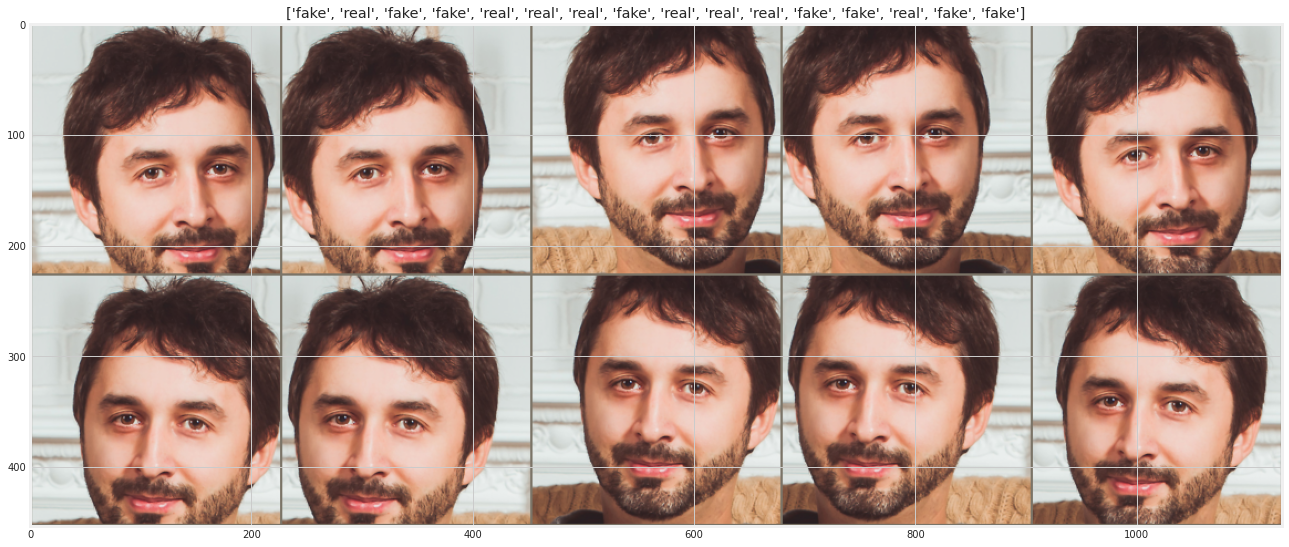

In [33]:
# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))
print(inputs.shape)
# Make a grid from batch
out = torchvision.utils.make_grid(inputs[10].reshape(-1, 3, 224, 224),nrow=5)

imshow(out, title=[class_names[x] for x in classes])

#### ResNet + 변형 FC + weight decay 0.1

In [34]:
from collections import OrderedDict
#num_ftrs = model_ft.fc.in_features
model_ft = models.resnet18(pretrained=True)
model_ft.fc = torch.nn.Sequential(OrderedDict([
            ('Linear1',torch.nn.Linear(512, 2, bias=True)),
            ('Dropout1',torch.nn.Dropout(0.5,inplace=False)),
            ('ReLU1',torch.nn.ReLU()),
            ('result',torch.nn.Softmax())]))
print(model_ft.state_dict)
model_ft = model_ft.to(device)

criterion = torch.nn.CrossEntropyLoss()

optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9,weight_decay=0.1)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=10, gamma=0.1)

model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=15)

<bound method Module.state_dict of ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:117: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


train Loss: 0.6934 Acc: 0.5150
valid Loss: 0.6788 Acc: 0.5255

Epoch 2/15
----------
train Loss: 0.6758 Acc: 0.5843
valid Loss: 0.6471 Acc: 0.6078

Epoch 3/15
----------
train Loss: 0.6520 Acc: 0.6464
valid Loss: 0.6339 Acc: 0.6549

Epoch 4/15
----------
train Loss: 0.6346 Acc: 0.6967
valid Loss: 0.6261 Acc: 0.6745

Epoch 5/15
----------
train Loss: 0.6156 Acc: 0.7379
valid Loss: 0.6136 Acc: 0.6980

Epoch 6/15
----------
train Loss: 0.6011 Acc: 0.7758
valid Loss: 0.6053 Acc: 0.6902

Epoch 7/15
----------
train Loss: 0.5861 Acc: 0.8131
valid Loss: 0.5938 Acc: 0.7216

Epoch 8/15
----------
train Loss: 0.5683 Acc: 0.8523
valid Loss: 0.6241 Acc: 0.6510

Epoch 9/15
----------
train Loss: 0.5497 Acc: 0.8869
valid Loss: 0.6125 Acc: 0.6745

Epoch 10/15
----------
train Loss: 0.5369 Acc: 0.9105
valid Loss: 0.6090 Acc: 0.6706

Epoch 11/15
----------
train Loss: 0.5261 Acc: 0.9392
valid Loss: 0.5822 Acc: 0.7255

Epoch 12/15
----------
train Loss: 0.5206 Acc: 0.9431
valid Loss: 0.5813 Acc: 0.7255
